# Analysis of Data

Plotting time!!!

Twitter Data Format:
- tweet_id: int
- date: str (MM-DD-YYYY)
- epochtime: long (in milliseconds)
- content: str 
- hashtags: list(string)
- like_count: int
- retweet_count: int
- reply_count: int
- user: str
- is_reply: boolean
- real_or_fake: boolean
- news_or_claim: boolean
- \+
- real_or_fake
- date
- claim_id
- tweet_id
- **or**
- news_id
- date
- real_or_fake
- tweet_id

## Claim Analysis:
Can refuting fake news make a difference over time?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

sns.__version__

'0.11.2'

In [15]:
df_claim_twitter_api = pd.read_csv("twitterAPIData/claim_twitter.csv")
df_claim_twitter_local = pd.read_csv("data/unifiedCSVs/raw_claim_twitter.csv")

df_claim = df_claim_twitter_local.drop(columns=["date", "real_or_fake"]).merge(df_claim_twitter_api, left_on='tweet_id', right_on='tweet_id')

df_claim.to_csv("claim_and_twitter.csv")

df_claim

,claim_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,100348,1299161972231950338,08-28-2020,1.598594e+12,What is situation with potential #COVID19 expo...,COVID19,2,0,1,15632680,False,real,claim
1,100348,1298790245505421312,08-27-2020,1.598505e+12,From everything that has been discussed about ...,NaN,0,0,0,232179414,False,real,claim
2,100348,1298448557255659522,08-26-2020,1.598424e+12,Mr Campbell be quiet! Closing the borders wor...,jamaicadebates2020,8,3,0,1592171442,False,real,claim
3,100348,1297927619850186752,08-24-2020,1.598299e+12,Questions for @GovRaimondo: 🤔Are we still payi...,NaN,16,2,3,351984175,False,real,claim
4,100348,1297530526388060165,08-23-2020,1.598205e+12,what is everyone’s problem w contact tracing/t...,NaN,3,0,1,739426940,False,real,claim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,100195,1270705440670781442,06-10-2020,1.591809e+12,@fourvoyagers U're right.We dont know anything...,NaN,0,0,1,446713715,True,real,claim
9058,100195,1270680405645987840,06-10-2020,1.591803e+12,@NorthBayNews Herd immunity is what the real e...,NaN,0,0,0,254453776,True,real,claim
9059,100195,1270554917820825601,06-10-2020,1.591773e+12,@ksatnews “Find out how puddle jumping turned ...,NaN,0,0,0,1223310942794059776,True,real,claim
9060,100195,1270529665942183941,06-10-2020,1.591767e+12,@sidafeloo @seattletimes Would have settled fo...,NaN,0,0,0,1234714484129746944,True,real,claim


55
Mean Fake Like Count: 53.05907172995781
Mean Fake Retweet Count: 9.050632911392405
Mean Real Like Count: 289.01110859215595
Mean Real Retweet Count: 60.73237361142598


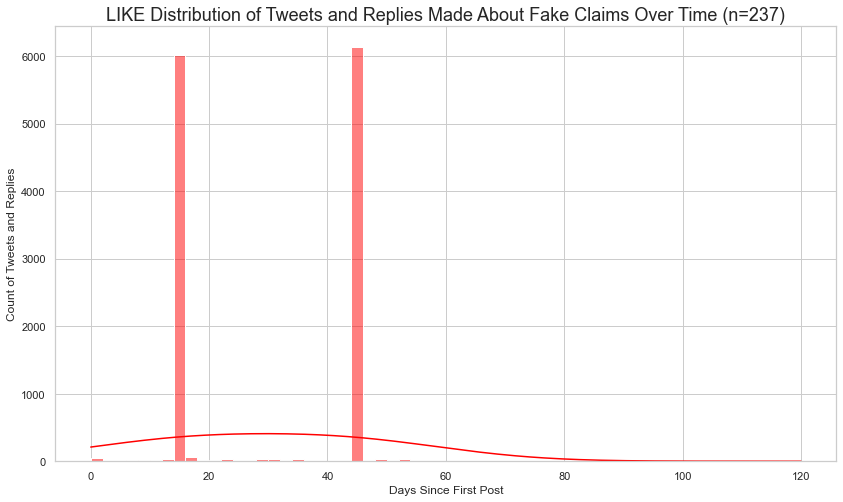

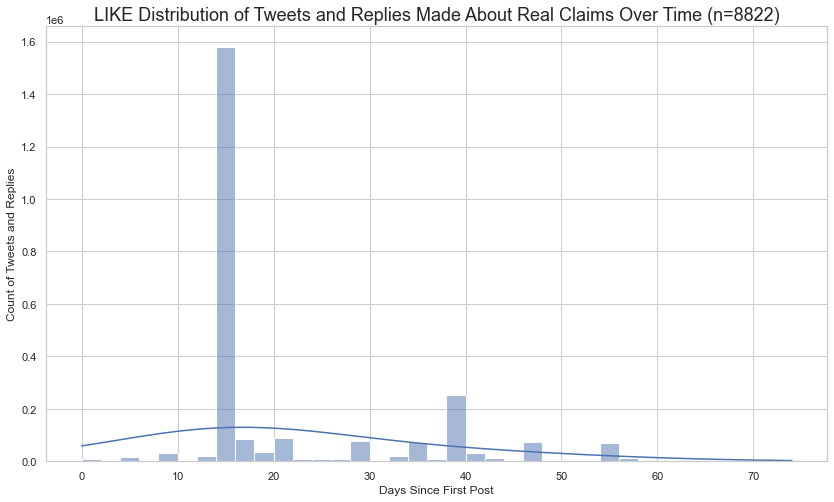

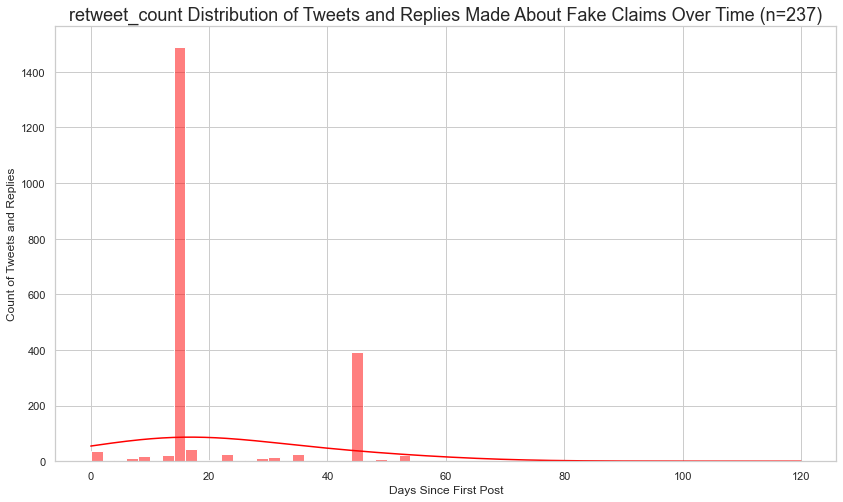

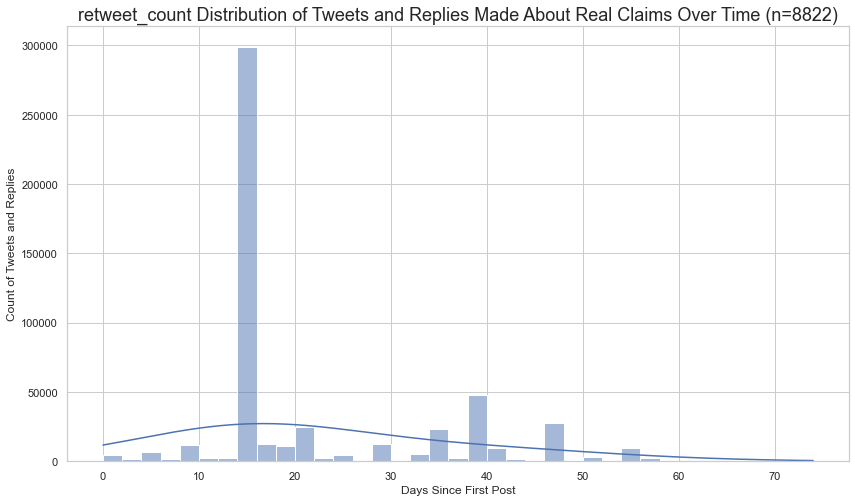

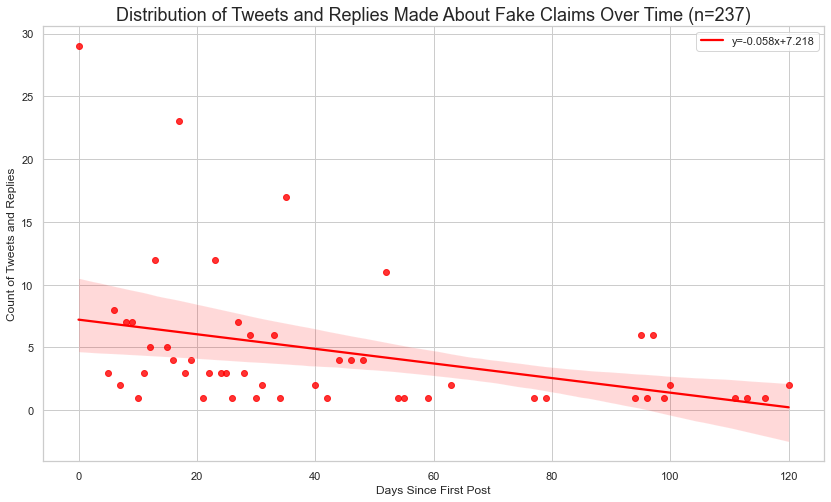

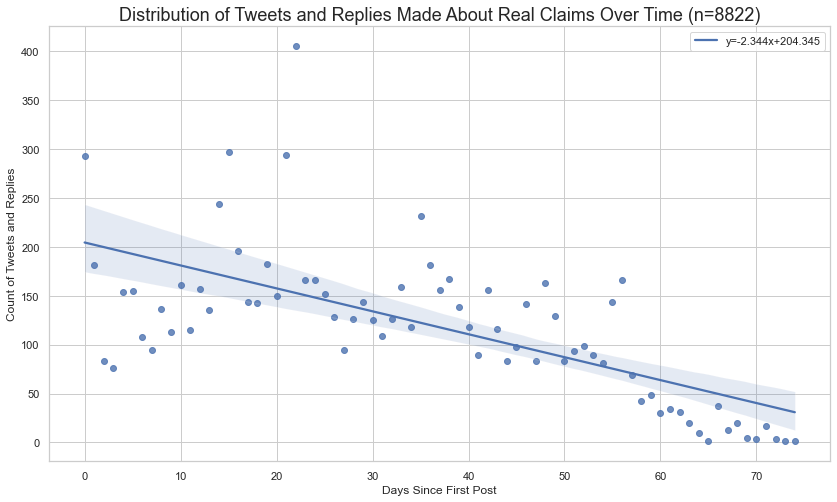

In [80]:
# Count of real and fake tweets per day sumed over all claims
# Also relative plots
sns.set_theme(style="whitegrid")

df_claim_groups = df_claim.groupby(["claim_id"])

df_aggregate_fake = pd.DataFrame()
df_aggregate_real = pd.DataFrame()

print(len(df_claim_groups))

for name, group in df_claim_groups:
  # print(group.shape[0])

  if group.shape[0] > 3:
    try:
      min_epoch_time = group["epochtime"].min()

      group["epochtime"] = group["epochtime"] - min_epoch_time

      group["days_since_start"] = np.round(group["epochtime"]/(1000 * 60 * 60 * 24)).astype(int)

      group_fake = group[group['real_or_fake'] == 'fake']
      group_real = group[group['real_or_fake'] == 'real']

      df_aggregate_fake = df_aggregate_fake.append(group_fake, ignore_index=True)
      df_aggregate_real = df_aggregate_real.append(group_real, ignore_index=True)

      # fig, ax = plt.subplots(figsize=(14, 8))
      # plt.xlabel("Days Since First Post")
      # plt.ylabel("Count of Tweets and Replies")
      # plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time for Claim {name} (n={group_fake.shape[0] + group_real.shape[0]})', fontsize=18)
      # sns.histplot(group_real, kde=True, alpha=.8, x="days_since_start", binwidth=2, ax=ax)
      # ax2 = ax.twinx()
      # sns.histplot(df_aggregate_fake, kde=True, alpha=1, x="days_since_start", binwidth=2, ax=ax2, color="#C5472C")
      # # sb.regplot(x='round', y='dead', data=firm,)
      # plt.show()

      # plt.figure(figsize=(14, 8))
      # ax = sns.histplot(group_fake, kde=True, x="days_since_start", binwidth=2, color="red", weights=group_fake["like_count"].values)
      # plt.xlabel("Days Since First Post")
      # plt.ylabel("Count of Tweets and Replies")
      # plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time for Claim {name} (n={group_fake.shape[0]})', fontsize=18)
      # plt.plot()

      # plt.figure(figsize=(14, 8))
      # ax = sns.histplot(group_real, kde=True, x="days_since_start", binwidth=2)
      # plt.xlabel("Days Since First Post")
      # plt.ylabel("Count of Tweets and Replies")
      # plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time for Claim {name} (n={group_real.shape[0]})', fontsize=18)
      # plt.plot()
    except Exception as e:
      print(e)
    # break

# fig, ax = plt.subplots(figsize=(14, 8))
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
# plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_real.shape[0] + df_aggregate_fake.shape[0]})', fontsize=18)
# sns.histplot(df_aggregate_real, kde=True, alpha=.8, x="days_since_start", binwidth=2, ax=ax)
# ax2 = ax.twinx()
# sns.histplot(df_aggregate_fake, kde=True, alpha=1, x="days_since_start", binwidth=2, ax=ax2, color="#C5472C")
# # sb.regplot(x='round', y='dead', data=firm,)
# plt.show()

print(f'Mean Fake Like Count: {df_aggregate_fake["like_count"].mean()}')
print(f'Mean Fake Retweet Count: {df_aggregate_fake["retweet_count"].mean()}')

print(f'Mean Real Like Count: {df_aggregate_real["like_count"].mean()}')
print(f'Mean Real Retweet Count: {df_aggregate_real["retweet_count"].mean()}')

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red", weights=df_aggregate_fake["like_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'LIKE Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2, weights=df_aggregate_real["like_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'LIKE Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()

fake_counts = df_aggregate_fake["days_since_start"].value_counts()
x_data_fake = fake_counts.index
y_data_fake = fake_counts.values


plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red", weights=df_aggregate_fake["retweet_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'retweet_count Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2, weights=df_aggregate_real["retweet_count"].values)
plt.xlabel("Days Since First Post")
plt.ylabel("Count of Tweets and Replies")
plt.title(f'retweet_count Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()

# fig, ax = plt.subplots(figsize=(14, 8))
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
# plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_real.shape[0] + df_aggregate_fake.shape[0]})', fontsize=18)
# sns.histplot(df_aggregate_real, kde=True, alpha=.8, x="days_since_start", binwidth=2, ax=ax)
# ax2 = ax.twinx()
# sns.histplot(df_aggregate_fake, kde=True, alpha=1, x="days_since_start", binwidth=2, ax=ax2, color="#C5472C")
# # sb.regplot(x='round', y='dead', data=firm,)
# plt.show()

fake_counts = df_aggregate_fake["days_since_start"].value_counts()
x_data_fake = fake_counts.index
y_data_fake = fake_counts.values

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data_fake, y_data_fake)

# use line_kws to set line label for legend
plt.figure(figsize=(14, 8))
# plt.subplots_adjust(bottom=0.15)
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Fake Claims Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
ax = sns.regplot(x=pd.Series(x_data_fake, name="Days Since First Post"), y=pd.Series(y_data_fake, name="Count of Tweets and Replies"), color='red', line_kws={'label':f"y={np.round(slope, 3)}x+{np.round(intercept, 3)}"})
ax.legend()
# plt.tight_layout()
plt.show()

real_counts = df_aggregate_real["days_since_start"].value_counts()
x_data_real = real_counts.index
y_data_real = real_counts.values

slope, intercept, r_value, p_value, std_err = stats.linregress(x_data_real, y_data_real)

# use line_kws to set line label for legend
plt.figure(figsize=(14, 8))
# plt.subplots_adjust(bottom=0.15)
# plt.xlabel("Days Since First Post")
# plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Real Claims Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
ax = sns.regplot(x=pd.Series(x_data_real, name="Days Since First Post"), y=pd.Series(y_data_real, name="Count of Tweets and Replies"), line_kws={'label':f"y={np.round(slope, 3)}x+{np.round(intercept, 3)}"})
ax.legend()
# plt.tight_layout()
plt.show()

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Day", y="Frequency", data=tips)
plt.title('Relative Frequency of Real and Fake Tweets for all Claims per Day')

'0.11.2'

In [2]:
df_news_articles = pd.read_csv("data/news_with_dates.csv")
df_news_articles = df_news_articles.dropna(subset=['date'])

df_news_twitter_api = pd.read_csv("twitterAPIData/news_twitter.csv")
df_news_twitter_local = pd.read_csv("data/unifiedCSVs/raw_news_twitter.csv")

df_news = df_news_twitter_local.drop(columns=["date", "real_or_fake"]).merge(df_news_twitter_api, left_on='tweet_id', right_on='tweet_id')

df_news

/home/berk/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,news_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,912,1293055689078853632,08-11-2020,1.597138e+12,I am a board certified internist with sub spec...,NaN,91.0,38,18,1652743814,False,fake,news
1,912,1291139259529744384,08-05-2020,1.596681e+12,July 31 at 8:40 AM Your post didn't follow our...,NaN,0.0,0,0,108117349,False,fake,news
2,912,1288959325981966337,07-30-2020,1.596161e+12,Hydroxychloroquine Zinc and Azithromycin are...,NaN,0.0,0,0,982335555634524161,False,fake,news
3,912,1288695178237272065,07-30-2020,1.596098e+12,Masks may not help completely but they can slo...,NaN,1.0,0,1,2915570708,False,fake,news
4,912,1288588802349363200,07-29-2020,1.596073e+12,WOW: Physicians have gathered in Whashington D...,WhiteCoatSummit,2.0,1,0,2989286755,False,fake,news
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68674,743,1250819009504669697,04-16-2020,1.587068e+12,COMMENTARY: A Better Way to Prioritize Essenti...,NaN,0.0,0,0,4351282707,False,real,news
68675,743,1250814599940595712,04-16-2020,1.587067e+12,COMMENTARY: A Better Way to Prioritize Essenti...,NaN,0.0,0,0,783283610803666944,False,real,news
68676,743,1250410688045936641,04-15-2020,1.586971e+12,#HospitalMedicine #Commentary A Better Way to ...,HospitalMedicine|Commentary,0.0,0,0,45764586,False,real,news
68677,744,1255819657484828674,04-30-2020,1.588260e+12,The lifestyle our children are forced to live ...,NaN,4.0,3,0,2513317758,False,real,news


In [8]:
# Count of real and fake tweets per claim
# Also relative plots

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Day", y="Frequency", data=tips)
plt.title('Relative Frequency of Real and Fake Tweets for all Claims per Day')

,claim_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,100348,1299161972231950338,08-28-2020,1.598594e+12,What is situation with potential #COVID19 expo...,COVID19,2,0,1,15632680,False,real,claim
1,100348,1298790245505421312,08-27-2020,1.598505e+12,From everything that has been discussed about ...,NaN,0,0,0,232179414,False,real,claim
2,100348,1298448557255659522,08-26-2020,1.598424e+12,Mr Campbell be quiet! Closing the borders wor...,jamaicadebates2020,8,3,0,1592171442,False,real,claim
3,100348,1297927619850186752,08-24-2020,1.598299e+12,Questions for @GovRaimondo: 🤔Are we still payi...,NaN,16,2,3,351984175,False,real,claim
4,100348,1297530526388060165,08-23-2020,1.598205e+12,what is everyone’s problem w contact tracing/t...,NaN,3,0,1,739426940,False,real,claim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9057,100195,1270705440670781442,06-10-2020,1.591809e+12,@fourvoyagers U're right.We dont know anything...,NaN,0,0,1,446713715,True,real,claim
9058,100195,1270680405645987840,06-10-2020,1.591803e+12,@NorthBayNews Herd immunity is what the real e...,NaN,0,0,0,254453776,True,real,claim
9059,100195,1270554917820825601,06-10-2020,1.591773e+12,@ksatnews “Find out how puddle jumping turned ...,NaN,0,0,0,1223310942794059776,True,real,claim
9060,100195,1270529665942183941,06-10-2020,1.591767e+12,@sidafeloo @seattletimes Would have settled fo...,NaN,0,0,0,1234714484129746944,True,real,claim


55
Mean Fake Like Count: 53.05907172995781
Mean Fake Retweet Count: 9.050632911392405
Mean Real Like Count: 289.01110859215595
Mean Real Retweet Count: 60.73237361142598


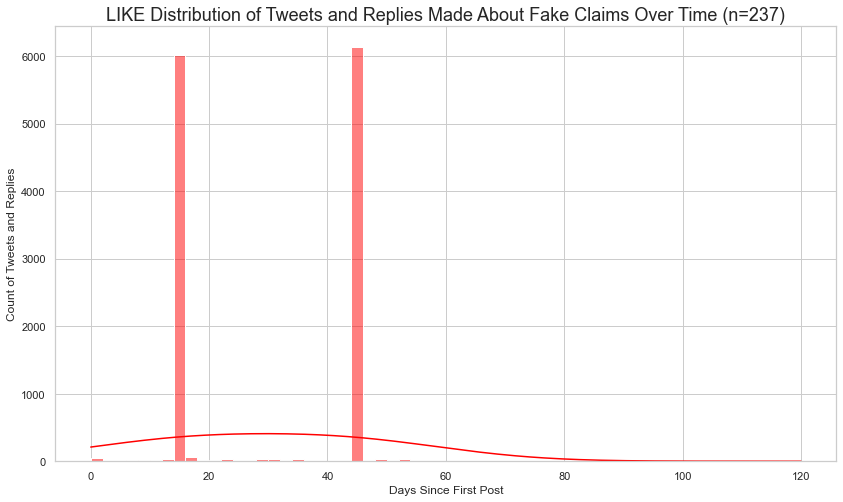

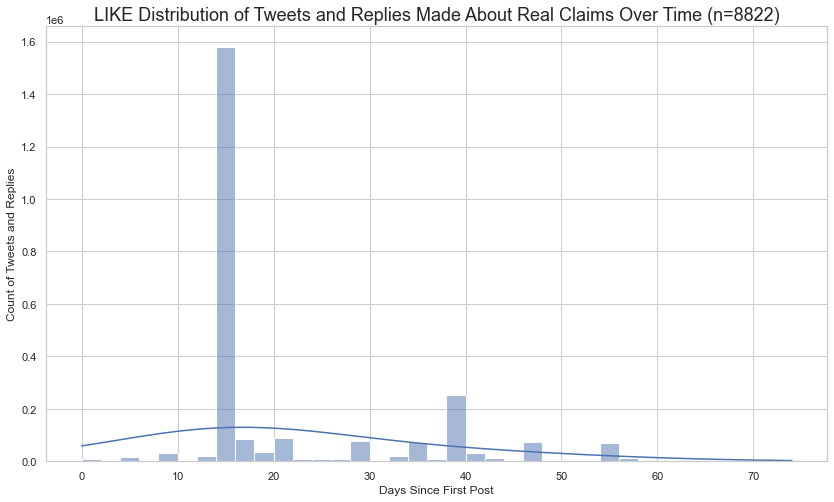

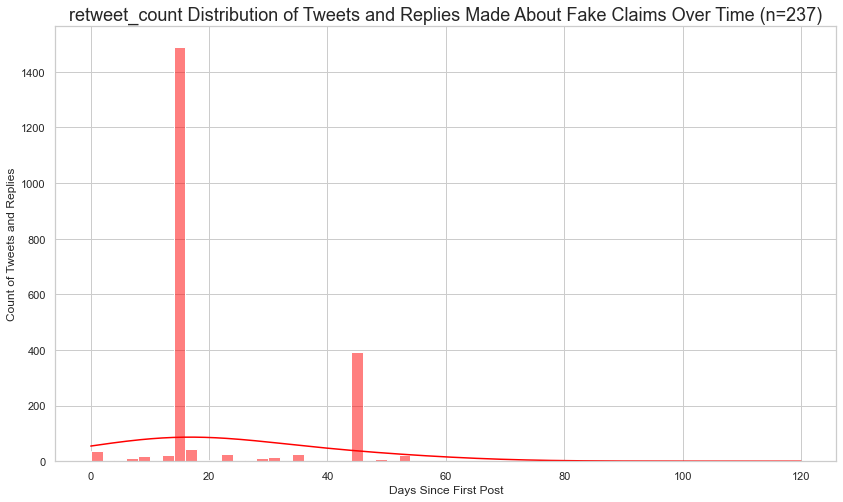

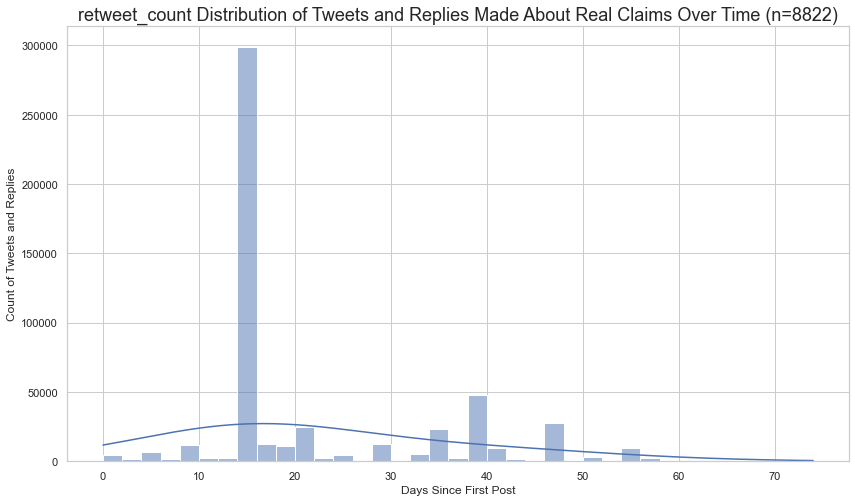

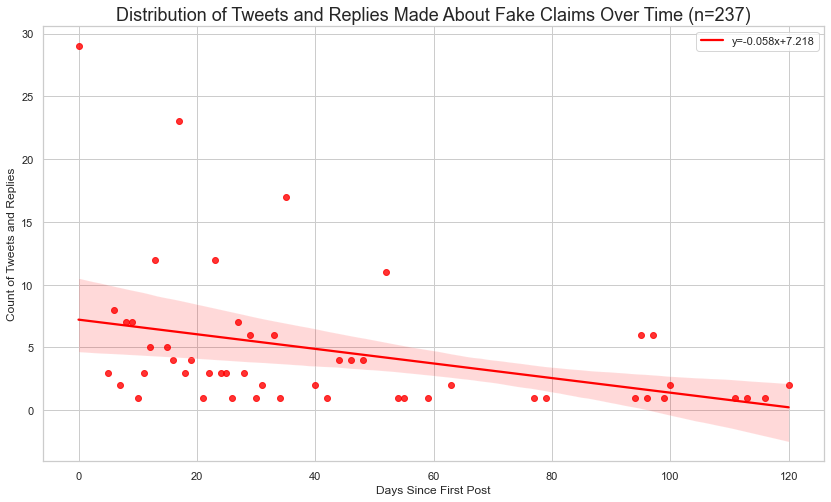

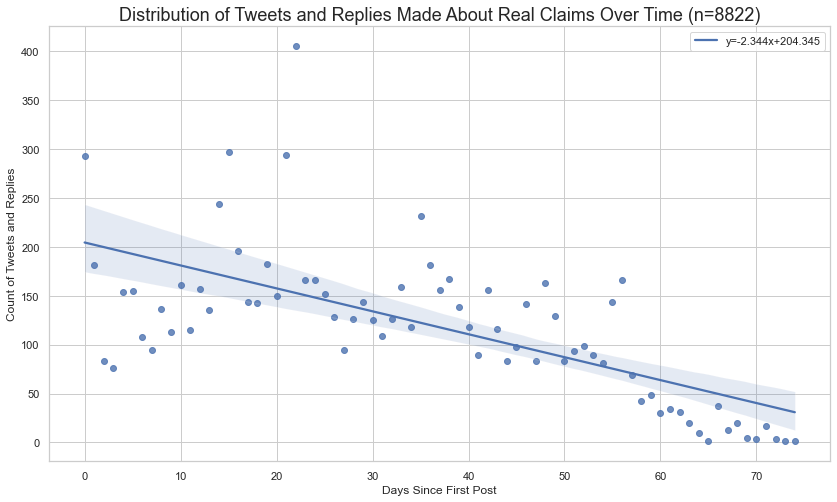

In [ ]:
# Real and fake tweets average likes over time
# Real and fake tweets average retweets over time

## News Analysis:
Comparing the spread of real and fake news.

In [2]:
df_news_articles = pd.read_csv("data/news_with_dates.csv")
df_news_articles = df_news_articles.dropna(subset=['date'])

df_news_twitter_api = pd.read_csv("twitterAPIData/news_twitter.csv")
df_news_twitter_local = pd.read_csv("data/unifiedCSVs/raw_news_twitter.csv")

df_news = df_news_twitter_local.drop(columns=["date", "real_or_fake"]).merge(df_news_twitter_api, left_on='tweet_id', right_on='tweet_id')

df_news

/home/berk/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,news_id,tweet_id,date,epochtime,content,hashtags,like_count,retweet_count,reply_count,user,is_reply,real_or_fake,news_or_claim
0,912,1293055689078853632,08-11-2020,1.597138e+12,I am a board certified internist with sub spec...,NaN,91.0,38,18,1652743814,False,fake,news
1,912,1291139259529744384,08-05-2020,1.596681e+12,July 31 at 8:40 AM Your post didn't follow our...,NaN,0.0,0,0,108117349,False,fake,news
2,912,1288959325981966337,07-30-2020,1.596161e+12,Hydroxychloroquine Zinc and Azithromycin are...,NaN,0.0,0,0,982335555634524161,False,fake,news
3,912,1288695178237272065,07-30-2020,1.596098e+12,Masks may not help completely but they can slo...,NaN,1.0,0,1,2915570708,False,fake,news
4,912,1288588802349363200,07-29-2020,1.596073e+12,WOW: Physicians have gathered in Whashington D...,WhiteCoatSummit,2.0,1,0,2989286755,False,fake,news
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68674,743,1250819009504669697,04-16-2020,1.587068e+12,COMMENTARY: A Better Way to Prioritize Essenti...,NaN,0.0,0,0,4351282707,False,real,news
68675,743,1250814599940595712,04-16-2020,1.587067e+12,COMMENTARY: A Better Way to Prioritize Essenti...,NaN,0.0,0,0,783283610803666944,False,real,news
68676,743,1250410688045936641,04-15-2020,1.586971e+12,#HospitalMedicine #Commentary A Better Way to ...,HospitalMedicine|Commentary,0.0,0,0,45764586,False,real,news
68677,744,1255819657484828674,04-30-2020,1.588260e+12,The lifestyle our children are forced to live ...,NaN,4.0,3,0,2513317758,False,real,news


678
68679


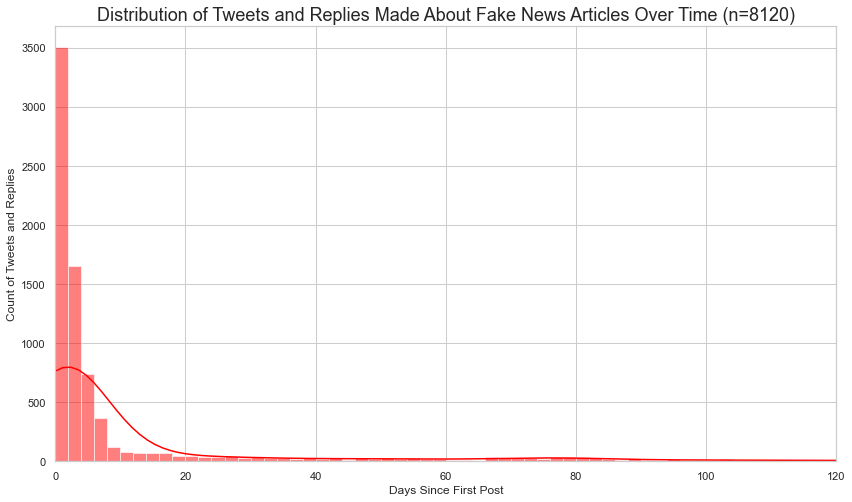

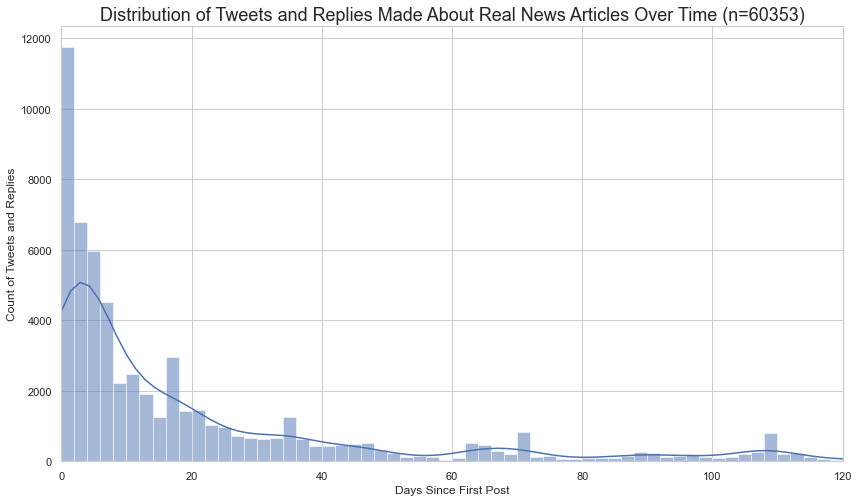

In [8]:
# Count of real and fake tweets per day sumed over all news
# Also relative plots
sns.set_theme(style="whitegrid")

df_news_groups = df_news.groupby(["news_id"])

df_aggregate_fake = pd.DataFrame()
df_aggregate_real = pd.DataFrame()

print(len(df_news_groups))
print(df_news.shape[0])

for name, group in df_news_groups:
  # print(group.shape[0])

  if group.shape[0] > 3:
    try:
      min_epoch_time = group["epochtime"].min()
      group["epochtime"] = group["epochtime"] - min_epoch_time

      group["days_since_start"] = np.round(group["epochtime"]/(1000 * 60 * 60 * 24)).astype(int)

      group_fake = group[group['real_or_fake'] == 'fake']
      group_real = group[group['real_or_fake'] == 'real']

      df_aggregate_fake = df_aggregate_fake.append(group_fake, ignore_index=True)
      df_aggregate_real = df_aggregate_real.append(group_real, ignore_index=True)

    except Exception as e:
      # print(e)
      pass


plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_fake, kde=True, x="days_since_start", binwidth=2, color="red")
plt.xlabel("Days Since First Post")
plt.xlim(0, 120)
plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Fake News Articles Over Time (n={df_aggregate_fake.shape[0]})', fontsize=18)
plt.plot()

plt.figure(figsize=(14, 8))
ax = sns.histplot(df_aggregate_real, kde=True, x="days_since_start", binwidth=2)
plt.xlabel("Days Since First Post")
plt.xlim(0, 120)
plt.ylabel("Count of Tweets and Replies")
plt.title(f'Distribution of Tweets and Replies Made About Real News Articles Over Time (n={df_aggregate_real.shape[0]})', fontsize=18)
plt.plot()
plt.show()